## EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 10: Review
## Due 15 December, 2019 at 11:59 PM

Copyright &copy; 2019, University of Washington

<hr>

**Instructions**: Choose **<u>one</u>** of the following problems. Solve the problem and then write up your solution in a stand alone Jupyter Notebook. Your notebook should have the following elements:

- Problem statement
- Mathematical description of the solution
- Executable code, commented, clear code

You will be graded on how well your notebook reads like a nicely formated, well written report. You must:

- Write mathematical descriptions using complete sentences, paragraphs, and LaTeX formulas. 
- Comment your code as necessary, with a description of what each function does and all major steps.
- Label plots axes, use legends, and use plot titles. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import sys
import random
import networkx as nx
import sympy as sm
sm.init_printing(use_latex='mathjax')
%matplotlib inline

# The DBLP Publication Network (100pts)

This dataset:

> http://konect.uni-koblenz.de/networks/dblp-author
  
contains a bipartite graph where the nodes are authors and academic papers. Each edge $(a,p)$ connects an author $a$ to a paper $p$. It contains 8.6 M edges (so it is a pretty large file). In this problem, we will analyze this data.

**Warmups:**

0. Find the minimum, maximum, and average, and standard deviation of the number of authors per paper.
0. Find the minimum, maximum, and average, and standard deviation of the number of papers per author.
0. Find the number of connected components of the network.
0. Pick several three metrics on graphs, evaluate them for this graph, and interpret their meanings. 

**Main question:**

Find the (not necessarily unique) author who has written the most papers. Call this author $X$. An author other than $X$ has an $X$-index of 1 if she has co-authored at least one paper with $X$. An author has an $X$-index of 2 if she does not have an $X$-index of 1, but has co-authored a paper with someone who has an $X$-index of 1. Similarly, you can define having an $X$-index of 3, 4, etc. 

Write a routine that produces the set of authors of a given index.

Make a plot with the $X$-index on the horizontal axis, and the number of authors with that $X$-index on the vertical axis. 

**Notes:** The network is encoded in the file above with two numbers per line separated by spaces. You will need to read that file using open and 'file.read' and turn it into a Python data string. Then use `split` to get a list of numbers. The numbers at even indices (starting at 0) are authors, and the numbers at odd indices are publications. Be careful not to do things that take a lot of operations or memory. The `networkx` library should work, as long as you don't try to draw the graph.

Also, you should develop your code using a smaller subset of the data so you do not spend a lot of time waiting. To facilitate this, I have put smaller subsets of the data here: 

  https://drive.google.com/drive/u/0/folders/1vwYKhqiD5GEFQi8WBMr63e2EUuk3DB22

The short version as 1,000 edges, the medium has 10,000 edges, the long version has 100,000 edges, and the "all" version has all the edges.

**Grading Breakdown:**

    20pts for a problem statement and mathematical description of the solution. The notebook should be a report.

    10pts for finding the minimum, maximum, and average, and standard deviation of the number of authors per paper.
    10pts for finding the minimum, maximum, and average, and standard deviation of the number of papers per author.
    10pts for finding the number of connected components of the network. 
    10pts for finding three metrics on graphs, evaluating them for this graph, and interpreting their meanings. 
    
    12pts for finding the (not necessarily unique) author who has written the most papers.
    14pts for writing a routine that produces the set of authors of a given index.
    14pts for making a plot of the X-index vs the number of authors with that X-index on the vertical axis.

# Graphs and Linear Algebra (100pts)

Recall that the adjacency matrix of an undirected graph has $A_{i,j} = 1$ if and only if nodes $i$ and $j$ are adjacent. Also , recall that a graph is **regular** with degree $k$ if every node has $k$ neighbors. We also say that the graph is $k$-regular. Finally, for shorthand, we say that the eigenvalues of a graph are the eigenvalues of its adjacency matrix.

**a)** Find three graphs with more than five nodes that are 2-regular, 3-regular, and 4-regular. Represent these in `networkx`, draw them, and find their adjacency matrices. These will be running examples for this problem.

**b)** Find the eigenvalues (of the adjacency matrices) of the three examples, along with the multiplicities of the eigenvalues.

**c)** Show that if $G$ is $k$-regular, then $k$ is an eigenvalue of $G$. 

**d)** Show that $G$ is $k$-regular and connected, then the eigenvalue $k$ of $G$ has multiplicity one. 

**e)** Show that $G$ is $k$-regular then $|\lambda|\leq k$ for any eigenvalue $\lambda$ of $G$. 

**f)** Let $J$ be the matrix of all ones and $A$ be the adjacency matrix of a $k$-regular graph. Show that $AJ = JA=kJ$. 

**g)** Show by construction that there exists a $k$-regular graph with n vertices has least eigenvalue equal to $-2$. 

**h)** Show that the following graph, called the Petersen Graph, is $3$-regular by finding its eigenvalues. 

<img src="https://www.researchgate.net/profile/Paul_Wenger/publication/45714891/figure/fig1/AS:669480808091681@1536628071715/The-Petersen-graph.png" width=20%>

**i)** Show that if both $n \geq k+1$ and $nk$ is even, then there exists a $k$-regular graph of size $n$. 

**Grading Breakdown:**

    10pts for a problem statement and mathematical description of the solution. The notebook should be a like a report. (This has less points because of the nature of the questions asked.)

    10pts (a) for answering a) correctly
    10pts (b) for finding the eigenvalues of the three examples, along with the multiplicities
    10pts (c) for proving if G is k-regular, then k is an eigenvalue of G. 
    10pts (d) for proving the claim similarly to the solution or with a reasonable and logical argument
    10pts (e) for proving the claim similarly to the solution or with a reasonable and logical argument
    10pts (f) for proving the claim similarly to the solution or with a reasonable and logical argument
    10pts (g) for constructing a k-regular graph with n vertices has least eigenvalue equal to -2
    10pts (h) for showing the Petersen Graph, is 3-regular by finding its eigenvalues and making a logical argument
    10pts (i) for proving the claim (possibly by construction) with a reasonable and logical argument

***
a) 

Find three graphs with more than five nodes that are 2-regular, 3-regular, and 4-regular. Represent these in `networkx`, draw them, and find their adjacency matrices.

C:\Users\victo\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


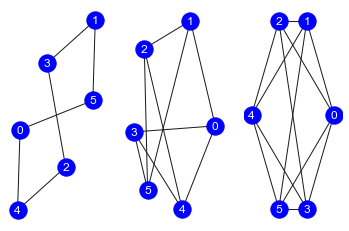

In [2]:
G1 = nx.random_regular_graph(2, 6, seed=42) # 2-regular, 6 nodes
G2 = nx.random_regular_graph(3, 6, seed=42) # 3-regular, 6 nodes
G3 = nx.random_regular_graph(4, 6, seed=42) # 4-regular, 6 nodes

basic_graph,ax = plt.subplots(1,3)
nx.draw(G1, ax=ax[0], pos=nx.kamada_kawai_layout(G1),with_labels=True, node_color='blue',font_color="white")
nx.draw(G2, ax=ax[1], pos=nx.kamada_kawai_layout(G2),with_labels=True, node_color='blue',font_color="white")
nx.draw(G3, ax=ax[2], pos=nx.kamada_kawai_layout(G3),with_labels=True, node_color='blue',font_color="white")

In [3]:
# Generate the sparse adjacency matrices and covert to a full matrix representation
A1 = nx.adjacency_matrix(G1, nodelist=None, weight='weight').todense()
A2 = nx.adjacency_matrix(G2, nodelist=None, weight='weight').todense()
A3 = nx.adjacency_matrix(G3, nodelist=None, weight='weight').todense()

# Convert to sympy matrices for futher analysis and nice outputs
A1,A2,A3 = sm.Matrix(A1),sm.Matrix(A2),sm.Matrix(A3)

print(A1 == A1.transpose(), A2 == A2.transpose(), A3 == A3.transpose()) # Symmetric Matrices
A1,A2,A3

True True True


⎛⎡0  1  1  0  0  0⎤  ⎡0  1  0  1  0  1⎤  ⎡0  1  1  0  1  1⎤⎞
⎜⎢                ⎥  ⎢                ⎥  ⎢                ⎥⎟
⎜⎢1  0  0  1  0  0⎥  ⎢1  0  1  0  1  0⎥  ⎢1  0  1  1  1  0⎥⎟
⎜⎢                ⎥  ⎢                ⎥  ⎢                ⎥⎟
⎜⎢1  0  0  0  1  0⎥  ⎢0  1  0  0  1  1⎥  ⎢1  1  0  1  0  1⎥⎟
⎜⎢                ⎥, ⎢                ⎥, ⎢                ⎥⎟
⎜⎢0  1  0  0  0  1⎥  ⎢1  0  0  0  1  1⎥  ⎢0  1  1  0  1  1⎥⎟
⎜⎢                ⎥  ⎢                ⎥  ⎢                ⎥⎟
⎜⎢0  0  1  0  0  1⎥  ⎢0  1  1  1  0  0⎥  ⎢1  1  0  1  0  1⎥⎟
⎜⎢                ⎥  ⎢                ⎥  ⎢                ⎥⎟
⎝⎣0  0  0  1  1  0⎦  ⎣1  0  1  1  0  0⎦  ⎣1  0  1  1  1  0⎦⎠

b)

Find the eigenvalues of the three examples, along with the multiplicities of the eigenvalues.

In [4]:
# Can also use the faster built-in networkx function
# nx.adjacency_spectrum(G1), nx.adjacency_spectrum(G2), nx.adjacency_spectrum(G3)

A1.eigenvals(), A2.eigenvals(), A3.eigenvals()

({-2: 1, -1: 2, 1: 2, 2: 1}, {-2: 2, 0: 2, 1: 1, 3: 1}, {-2: 2, 0: 3, 4: 1})

c)

Show that if $G$ is $k$-regular, then $k$ is an eigenvalue of $G$. 
***
*Proof:*

Because $G$ is a $k$-regular graph (we're assuming its also undirected), its adjacency matrix $A$ will be symmetric and have $k$ ones in any given row or column as a consequence of its definition. So if we multiply by a vector of all ones we see

$$Ax = A\mathbb{1}_{nx1} = \begin{pmatrix} k \\ \vdots \\ k\end{pmatrix} = k\mathbb{1}_{nx1}. $$

Thus, $k\in \lambda(A).$

In [5]:
v = sm.Matrix([[1],[1],[1],[1],[1],[1]]) # Vector of all 1s
A1 @ v, A2 @ v, A3 @ v # Multiplication with the Adjacency matrices to get an eigenvalue equation

⎛⎡2⎤  ⎡3⎤  ⎡4⎤⎞
⎜⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎟
⎜⎢2⎥  ⎢3⎥  ⎢4⎥⎟
⎜⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎟
⎜⎢2⎥  ⎢3⎥  ⎢4⎥⎟
⎜⎢ ⎥, ⎢ ⎥, ⎢ ⎥⎟
⎜⎢2⎥  ⎢3⎥  ⎢4⎥⎟
⎜⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎟
⎜⎢2⎥  ⎢3⎥  ⎢4⎥⎟
⎜⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎟
⎝⎣2⎦  ⎣3⎦  ⎣4⎦⎠

d)

Show that $G$ is $k$-regular and connected, then the eigenvalue $k$ of $G$ has multiplicity one. 
***
We will make use of the Perron-Forbenius theorm to solve this problem.


$\mathbf{Theorem }$ $(Perron-Frobenius):$ 
If an $n \times n$ matrix has nonnegative entries then it has
a nonnegative real eigenvalue $\lambda$ which has maximum absolute value among all eigenvalues.
This eigenvalue $\lambda$ has a nonnegative real eigenvector. If, in addition, the matrix has no blocktriangular decomposition (i.e., it does not contain a $k \times (n − k)$ block of $0$'s disjoint from the
diagonal), then $\lambda$ has multiplicity $1$ and the corresponding eigenvector is positive.
***
*Proof:*

Because $G$ is $k$-regular and connected, $A$ is symmetric and contains $k$ ones in every row and column, thus $\forall ij,$ $(A)_{ij} \geq 0$. Furthermore, there cannot exist a $k \times (n − k)$ block of $0$'s disjoint from the
diagonal given the symmetries, so, by the Perron-Forbenius theorm, $\lambda$ has multiplicity $1$ and the corresponding eigenvector is positive. We show in c) that $k\in \lambda(A)$ and in e) that $|\lambda(A)| \leq k$, thus the maximal eigenvalue $\lambda=k$.

See "Eigenvalues of graphs" by Laszlo Lovasz for further reading.

e)

Show that $G$ is $k$-regular then $|\lambda|\leq k$ for any eigenvalue $\lambda$ of $G$. 
***
*Proof:*

Consider the eignevalue equation $Ax = \lambda x$ and let $\max (x) = || x ||_{\infty} = x_i.$ We can reexpress the RHS as

$$\lambda x_i = \sum\limits_{j=1}^{n}A_{ij}x_j$$

which is just the matrix-vector multiplication of the $i^{th}$ entry of the product. This allows us to approximate:

$$\begin{align}
|\lambda x_i| &= |\sum\limits_{j=1}^{n}A_{ij}x_j| \\
&\leq \sum\limits_{j=1}^{n}|A_{ij}x_j| \text{ via triangle ineq.}\\
&= \sum\limits_{j=1}^{n}|A_{ij}||x_j| \text{ via abs. value}\\
&\leq \sum\limits_{j=1}^{n}|A_{ij}||x_i| \text{ via} \max(x)=|x_i| \\
&\leq k |x_i|
\end{align}$$

because there are $k$ ones in any row or column of $A$ (i.e. $G$ is $k$-regular) and we can factor out $|x_i|$. Thus,

$$|\lambda| \leq k.$$

f)

Let $J$ be the matrix of all ones and $A$ be the adjacency matrix of a $k$-regular graph. Show that $AJ = JA=kJ$.
***
*Proof:*

Observe that the $ij^{th}$ entry of the matrices are found by computing the inner products of the $i^{th}$ row of $A$ with the $j^{th}$ column of $\mathbb{1}_{nxn}$. Because $G$ is a $k$-regular graph, $A$ will have $k$ ones in any given row or column as a consequence of its definition. So

$$(AJ)_{ij} = a_i^T\mathbb{1}_{nx1} = k. $$

Similarly,

$$(JA)_{ij} = \mathbb{1}_{nx1}^Ta_j = k .$$

Thus,

$$AJ = JA = k\mathbb{1}_{nxn} = kJ.$$

In [6]:
n = 6
J = np.ones((n,n))
A1 @ J, J @ A1

⎛⎡2.0  2.0  2.0  2.0  2.0  2.0⎤  ⎡2.0  2.0  2.0  2.0  2.0  2.0⎤⎞
⎜⎢                            ⎥  ⎢                            ⎥⎟
⎜⎢2.0  2.0  2.0  2.0  2.0  2.0⎥  ⎢2.0  2.0  2.0  2.0  2.0  2.0⎥⎟
⎜⎢                            ⎥  ⎢                            ⎥⎟
⎜⎢2.0  2.0  2.0  2.0  2.0  2.0⎥  ⎢2.0  2.0  2.0  2.0  2.0  2.0⎥⎟
⎜⎢                            ⎥, ⎢                            ⎥⎟
⎜⎢2.0  2.0  2.0  2.0  2.0  2.0⎥  ⎢2.0  2.0  2.0  2.0  2.0  2.0⎥⎟
⎜⎢                            ⎥  ⎢                            ⎥⎟
⎜⎢2.0  2.0  2.0  2.0  2.0  2.0⎥  ⎢2.0  2.0  2.0  2.0  2.0  2.0⎥⎟
⎜⎢                            ⎥  ⎢                            ⎥⎟
⎝⎣2.0  2.0  2.0  2.0  2.0  2.0⎦  ⎣2.0  2.0  2.0  2.0  2.0  2.0⎦⎠

g)

Show by construction that there exists a $k$-regular graph with n vertices has least eigenvalue equal to $-2$. 

Iterations: 5 
obj - np.amin(A16)= 0j


C:\Users\victo\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


(array([ 4.00000000e+00+0.j, -2.00000000e+00+0.j, -6.82546018e-17+0.j,
         1.41421356e+00+0.j,  1.41421356e+00+0.j, -1.41421356e+00+0.j,
        -1.41421356e+00+0.j, -2.00000000e+00+0.j]),
 matrix([[0, 1, 1, 1, 0, 0, 0, 1],
         [1, 0, 0, 1, 0, 1, 0, 1],
         [1, 0, 0, 1, 1, 0, 1, 0],
         [1, 1, 1, 0, 1, 0, 0, 0],
         [0, 0, 1, 1, 0, 1, 1, 0],
         [0, 1, 0, 0, 1, 0, 1, 1],
         [0, 0, 1, 0, 1, 1, 0, 1],
         [1, 1, 0, 0, 0, 1, 1, 0]], dtype=int32))

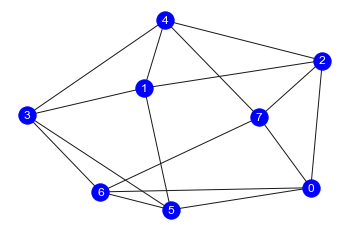

In [7]:
klow, khigh, n = 4, 7, 8     # Must ensure nk is even
G = nx.random_regular_graph(np.random.randint(klow,khigh), n)
A = nx.adjacency_spectrum(G) # Grab the spectrum of the random graph--this method will have machine precision errors
obj = -2                     # The Objective function
tol = 0.001                  # Set the accuracy
iters = 1                    # Track the iterations

while abs(obj - np.amin(A)) > tol:
    iters += 1
    G = nx.random_regular_graph(np.random.randint(klow,khigh), n)
    A = nx.adjacency_spectrum(G)

print('Iterations:',iters,'\nobj - np.amin(A16)=', obj - np.amin(A))  
    
basic_graph,ax = plt.subplots(1,1)
nx.draw(G, ax=ax, pos=nx.kamada_kawai_layout(G),with_labels=True, node_color='blue',font_color="white")

A, nx.adjacency_matrix(G).todense()

h)

Show that the Petersen Graph, is $3$-regular by finding its eigenvalues. 
***
Spectral Graph Theory tells us that a graph with $n$ nodes is $k$-regular if and only if: 
- $AJ=kJ$ where $J=\mathbb{1}_{nxn}$
- $\sum\limits_{i=1}^{n}\lambda_i^2 = nk$.

Notice that $\max \lambda(G_p) = \max \lambda(A_p) = 3$ with a multiplicity of $1$ and corresponding eigenvector $(1,\dots ,1)^T$. Using the theorem above and the eigenvalues of $A$ we see that $G$ is $3$-regular becuase 
$$
\sum\limits_{i=1}^{10}\lambda_i^2 = 30 = (10)(3) = nk.
$$

Alternatively, using the existence condition in part i), since $10 \geq 3+1$ and $(10)(3)=30$ is even, then there exists a $3$-regular graph of size $10$, i.e. the Peterson Graph.

C:\Users\victo\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


30


⎡-2  0   0   0   0  0  0  0  0  0⎤
⎢                                ⎥
⎢0   -2  0   0   0  0  0  0  0  0⎥
⎢                                ⎥
⎢0   0   -2  0   0  0  0  0  0  0⎥
⎢                                ⎥
⎢0   0   0   -2  0  0  0  0  0  0⎥
⎢                                ⎥
⎢0   0   0   0   1  0  0  0  0  0⎥
⎢                                ⎥
⎢0   0   0   0   0  1  0  0  0  0⎥
⎢                                ⎥
⎢0   0   0   0   0  0  1  0  0  0⎥
⎢                                ⎥
⎢0   0   0   0   0  0  0  1  0  0⎥
⎢                                ⎥
⎢0   0   0   0   0  0  0  0  1  0⎥
⎢                                ⎥
⎣0   0   0   0   0  0  0  0  0  3⎦

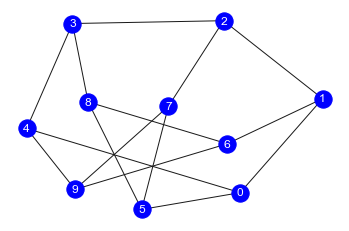

In [8]:
Gp = nx.petersen_graph() # Generate Petersen graph
basic_graph,ax = plt.subplots(1,1)
nx.draw(Gp, ax=ax, pos=nx.kamada_kawai_layout(Gp),with_labels=True, node_color='blue',font_color="white")

Ap = nx.adjacency_matrix(Gp, nodelist=None, weight='weight').todense() # Get adjacency matrix
Ap = sm.Matrix(Ap) 
S,D = Ap.diagonalize() # See the eigenvalues and vectors

print(sum(np.diag(D)**2)) # Check the theorem condition
D

i) 

Show that if both $n \geq k+1$ and $nk$ is even, then there exists a $k$-regular graph of size $n$. 
***
*Proof (by construction):*

We will denote our nodes by $i\in\{1,2,\dots,n\}$. (Note that from the handshaking lemma, a regular graph of odd degree will contain an even number of vertices.)

Firstly, if $n = k+1$ then the graph in consideration is the complete graph of $n$ nodes, which is by definition regular.

Next, let's consider the case where $k$ is even, $n > k+1$, and $nk$ is even. This implies that $n$ can be even or odd. We can contruct a $k$-regular graph with $n$ nodes that satisfies all of our conditions by connecting any node $i$ to nodes $v\in V$ where

$$V = \{v :  v = (i + j\;mod{(n)} - 1)\;mod{(n)} + 1\} - \{i\}$$

and $j\in[\frac{-k}{2}, \frac{k}{2}]$ such that $j\in\mathbb{Z}$. We subtract $i$ to remove the edge from node $i$ to itself.


Finally, let's consider the case where $k$ is odd, $n > k+1$, and $nk$ is even. This implies that $n$ must be even. We can contruct a $k$-regular graph with $n$ nodes that satisfies all of our conditions by connecting any node $i$ to nodes $v\in V$ where

$$V = \{v :  v = (i + \frac{j}{2}\;mod{(n)} - 1)\;mod{(n)} + 1\} - \{i\}$$

and $j\in J = [\dots, n-2,\; n, \;n+2, \dots]$ such that $|J|=k$. For instance, if $k=1 \implies J = \{n\};$ if $k=3 \implies J = [n-2, \;n,\; n+2];$ and if $k=5 \implies J = [n-4,\; n-2,\; n,\; n+2, \;n+4]. $ We subtract $i$ to remove the edge from node $i$ to itself.

***

*Proof 2: due to Amitabha Tripathia, Sujith Vijay*


"The necessity of the condition follows from the fact that the sum of vertex degrees of a finite graph is always
even. For the sufficiency, it is enough to prove the case when $0 \leq r \leq (p − 1)/2$ since the complement of an $r$-regular graph of order $p$ is a $(p − 1 − r)$-regular graph of the same order. Consider $p$ vertices placed in a circle. If $r$ is even, join each vertex to exactly $r/2$ vertices immediately to its left and immediately to its right. If $r$ is odd, $p$ must be even so that there is a vertex diagonally opposite each vertex. Join each vertex to exactly $(r − 1)/2$ vertices immediately to its left and immediately to its right, and also to the vertex diagonally opposite it. This constructs an $r$-regular graph of order $p$ in all cases when $pr$ is even."

C:\Users\victo\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


(False, False, False)

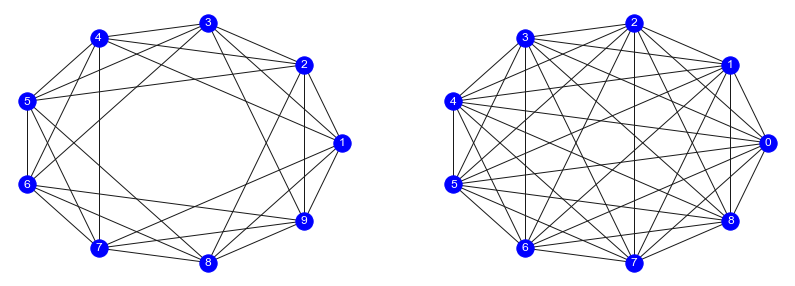

In [9]:
# CASE: k  is EVEN,  n > k+1 , and  nk  is even.

k = 6 # Must be an even number and n >= k+1 and nk even
n = 9 # Can be even or odd
j = np.arange(-k/2, k/2+1) # Symmetric interval

edges = [] 

for i in range(1,n+1): # Loop for every node in the graph to form the connections
    es = (i + j%n - 1)%n + 1 # this is somewhat magical and we got lucky
    E = [(i,int(v)) for v in es if int(v)!=i] # basically the Cartesian product and don't include (i,i)
    for u in E: 
        edges.append(u) # dump valid edges into the list of edges
        
G = nx.Graph()
G.add_nodes_from(range(1,n+1)) 
G.add_edges_from(edges)

K = nx.complete_graph(n) # Generate a complete graph for comparison

basic_graph,ax = plt.subplots(1,2, figsize=(14,5))
nx.draw(G, ax=ax[0], pos=nx.kamada_kawai_layout(G),with_labels=True, node_color='blue',font_color="white")
nx.draw(K, ax=ax[1], pos=nx.kamada_kawai_layout(K),with_labels=True, node_color='blue',font_color="white")

nx.is_strongly_regular(G), nx.is_distance_regular(G), nx.is_isomorphic(G,K) # Check some other conditions

(False, False, False)

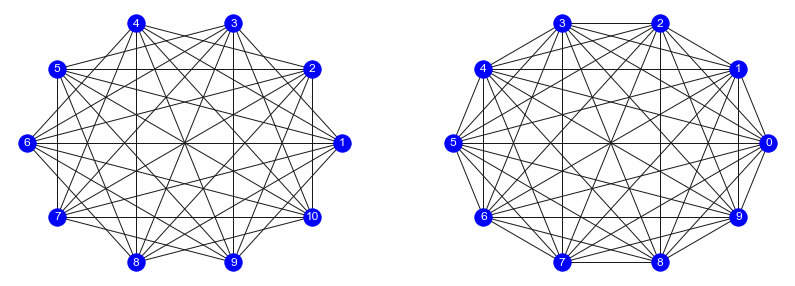

In [10]:
# CASE: k  is ODD,  n > k+1 , and  nk  is even.

k = 7 # Must be an odd number and n >= k+1 and nk even
n = 10  # Must be even 
step =  int(np.floor(k/2)) # odd/2 is decimal, so we round down
j = list(np.linspace(n - 2*step, n-2, step)) + [n] +  list(np.linspace(n+2, n + 2*step, step))
j = np.asarray(j) # turn into an array for elementwise computations

edges = [] 

for i in range(1,n+1): # Loop for every node in the graph to form the connections
    es = (i + (j*0.5)%n - 1)%n + 1 # this is somewhat magical
    E = [(i,int(v)) for v in es if int(v)!=i] # basically the Cartesian product and don't include (i,i)
    for u in E: 
        edges.append(u)
        
G = nx.Graph()
G.add_nodes_from(range(1,n+1)) 
G.add_edges_from(edges)

K = nx.complete_graph(n)

basic_graph,ax = plt.subplots(1,2, figsize=(14,5))
nx.draw(G, ax=ax[0], pos=nx.kamada_kawai_layout(G),with_labels=True, node_color='blue',font_color="white")
nx.draw(K, ax=ax[1], pos=nx.kamada_kawai_layout(K),with_labels=True, node_color='blue',font_color="white")

nx.is_strongly_regular(G), nx.is_distance_regular(G), nx.is_isomorphic(G,K)

## Resources:

- https://networkx.github.io/documentation/stable/reference/generators.html
- http://www.cs.yale.edu/homes/spielman/561/2012/lect03-12.pdf
- http://web.cs.elte.hu/~lovasz/eigenvals-x.pdf
- https://orion.math.iastate.edu/butler/PDF/dissertation.pdf
- http://www.cs.utah.edu/~bhaskara/courses/x968/notes/lec5.pdf
- Spectral Graph Theory Lecture Notes: http://web.math.ucsb.edu/~padraic/ucsb_2014_15/ccs_discrete_s2015/ccs_discrete_s2015_lecture4.pdf
- Graphs with least eigenvalue −2: http://www-groups.mcs.st-andrews.ac.uk/~pjc/Teaching/MT5821/3/w4.pdf
- Graphs with least eigenvalue −2; a historical survey and recent developments in maximal exceptional graphs: https://core.ac.uk/download/pdf/82809187.pdf
- Existence of connected regular and nearly regular graphs: https://arxiv.org/pdf/1801.08345.pdf
- On the least size of a graph with a given degree set: http://web.iitd.ac.in/~atripath/publications/degree_set_least_size.pdf
- "Spectra of graphs" by Andries E. Brouwer, Willem H. Haemers pg.37: https://www.win.tue.nl/~aeb/2WF02/spectra.pdf

# Hallucinating the Constitution

Consider the constitution of the United States:

> https://www.usconstitution.net/const.txt .

This document contains upper- and lower-case letters, numbers, and basic punctuation. 

**One letter prediction:**

1. Find the set of all characters used in the document. Call the number of characters $n$. 
2. Create an $n \times n$ matrix whose $i,j$ entry is the probability that the next character is $j$ given that the current character is $i$. Estimate this probability by looking at all occurrences of character $i$ in the document and the number of times character $j$ immediately follows it. 
3. Simulate this system as a Markov chain that starts with an arbitrary capital letter and continues until it gets to a space. Produce $100$ random "words" this way. How many of them are actual words? Use a [Scrabble dictionary](https://scrabble.hasbro.com/en-us/tools#dictionary) if you are not certain whether a given sequence is a word. 

**Two letter prediction:**

1. Create an $n \times n \times n$ tensor whose $i,j,k$ entry is the probability that the next character is $k$ given that the current character is $j$ and the previous character is $i$. Use the document to empirically find these probabilities. 
2. Use this model to construct random words. 

**Sentence prediction:**

Do a one word prediction, but use all the unique *words* in the document. Hallucinate sentences. Consider a punctuation mark as a word. 

**Notes:** Use `open` and `file.read` to read in the file as a string. For the sentence. Use `replace` to add space before punctuation and then `split()` to turn the string into a list. Use a `DiGraph` from the `networkx` library to store the data. Note that you can make weighted edges by adding data to the edges, as in [this document](https://networkx.github.io/documentation/stable/auto_examples/drawing/plot_weighted_graph.html).

**Grading Breakdown:** (Lots of room for creativity and variation)

    20pts for a problem statement and mathematical description of the solution. The notebook should be a report.

    5pts (a) for finding the set of all characters
    10pts (a) for defining explicitly or implicitly (in a graph or dictionary with the frequencies) an nxn tensor of the ij probabilities
    10pts (a) for simulating the system to start with an arbitrary capital letter and produces 100 words.
    5pts (a) for checking how many of them are actual words
    
    10pts (b) for defining explicitly or implicitly (in a graph or dictionary with the frequencies) an nxnxn tensor of the ijk probabilities 
    10pts (b) for using this model to construct random words. 
    
    10pts (c) for partitioning the data as a list of words
    10pts (c) for defining explicitly or implicitly (in a graph or dictionary with the frequencies) an nxn tensor of the ij probabilities of going from word i to word j
    10pts (c) for using this model to construct random words. Length of sentences doesn't matter.

***
### Solution: 
First, let's clean up the data and bring in relevant imports.

- `nltk` is used to check if a generated 'word' is actually a valid english word

In [4]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\victo\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [2]:
file = open('const.txt',mode='r') # file data
text = file.read() # save the data as a string
file.close()

In [3]:
# Has the effect of separating  out punctuation marks that are directly following a word or next to each other
data = text.replace(".", " . ").replace('\n', ' ')

# List of characters including spaces, but excluding '\n' in order of appearance
data1 = [char for datum in data for char in datum]

# Split constitution text into words
data_word = data.replace("[","").replace("]","").replace(",", " , ").replace("-", " - ").replace(";", " ; ").replace(":", " : ").split()

In [22]:
'Um' in text

False

**One letter prediction:**

1. Find the set of all characters used in the document. Call the number of characters $n$. 
2. Create an $n \times n$ matrix whose $i,j$ entry is the probability that the next character is $j$ given that the current character is $i$. Estimate this probability by looking at all occurrences of character $i$ in the document and the number of times character $j$ immediately follows it. 
3. Simulate this system as a Markov chain that starts with an arbitrary capital letter and continues until it gets to a space. Produce $100$ random "words" this way. How many of them are actual words? 

#### Solution: 

The matrix is implicitly defined in the graph. The fragment `[(u,v,d) for (u,v,d) in Grph.edges(data=True) if u == letter]` reveals all the edges between the `i`$^{th}$ character in the Consititution to a next character `j`, and their frequency of occcurance. From this we can calculate the empirical probability of transition from `i` to `j` as

$$
P[ij] = \frac{\text{frequency of a path from $i$ to $j$ in text}}{\text{# of edges out of node $i$}}
$$

i.e. `s = edges[i][2]["count"] / sum([d["count"] for (u,v,d) in edges])`.

In [14]:
def make_edges(Grph, DATA):
    '''
    Assumes: DATA contains a list of characters including spaces, but excluding '\n' in order of appearance in the Constitution
             Grph is an instantiated DiGraph
    Returns: Grph that has been populated with edges from the DATA
    '''
    previous = None # empty container for initialization

    # Add a data dictionary for the attribute 'count' t each edge
    for current in DATA: # loop through every word in order
        if not previous: # will execute if previous is any kind of zero or empty container, or False.
            previous = current
        else:
            if Grph.has_edge(previous, current): # If current is already a "word" that immediately follows from previous
                Grph.get_edge_data(previous, current)["count"] += 1 # Returns the attribute dictionary associated with edge (u, v).
            else:
                Grph.add_edge(previous, current, count=1) # Found a new edge so let's mark it down
            previous = current # save a new value of previous for the next iteration 

def halucinate_char(letter,Grph):
    '''
    Assumes: letter is a node in Grph, 
             Grph has been populated with nodes and edges
    Returns: a 100 word string (of mostly nonsense) 
    '''
    sentence = [letter] # Our initialized list of words
    word_count = len(sentence)
    while word_count < 101: # Keep appending words to sentece until a period is reached and 100 words made
        edges = [(u,v,d) for (u,v,d) in Grph.edges(data=True) if u == letter] # Return edge attribute dict in 3-tuple (u, v, ddict).
        total = sum([d["count"] for (u,v,d) in edges]) # total edges connected to current 'word'
        r = random.random() # Generate a probability--the threshold for transition
        i = 0 # intialize the index
        s = edges[i][2]["count"] / total # initialize the probability 
        while r > s: # while some uniform random probability of transition > s 
            i += 1 # increment the index
            s += edges[i][2]["count"] / total # Accumulate probability for 'word' to transition to edges[i][1]
        letter = edges[i][1] # update word to be character we successfully transitioned to
        if letter != ' ':
            sentence.append(letter) # append word to sentence
        else:
            if sentence[-1] != ' ':
                sentence.append(letter) # append word to sentence
                word_count += 1
            else:
                continue
    return "".join(sentence) # Convert our list of strings to one long string with spaces between elements

In [15]:
G1 = nx.DiGraph()
make_edges(G1, data1)
sentence = halucinate_char('P',G1) # Start with an arbitrart capital letter
sentence

'Prse t an ucthid edmappre all penig orvepeshensesictenthere Un hont thepen benicheontsict Chr gawher o Preny allllombevepr Benere s mbl me Stwictofe s s, s, wicted owheshelle wher ts, sheoshe tonf ve tiored rorecur honthel hecal ax gre 1 Ho bs on iche besimallliedmo hononstr Conein acecteomorent Und t hes watian ns tivictwiave Stovithalichatathetind . onl Stalend bealle Bait, sifio botenke coro th mm assin hall Praghesummas Ocuchiof Reprerepres, tids ces . ars Covorendes St ore wicous . Aprsalorid; tthiof Crer 221 ttive iere ha ortavos susptig mathenes Trpumedg att at . Sthidesprithit as is Sthe fon Cl tideal n '

In [46]:
def check4Words(sentence):
    '''
    Assumes: sentence is a str
    Reutrns: Checks for valid English words and returns the list of valid words and its length
    '''
    wc = 0 #valid word count
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    valid = []
    for word in sentence.split(): # Loop through every 'word' generated
        if word in english_vocab:
            wc += 1
            valid.append(word)
    return wc, valid

In [47]:
valid_wc, valid_set = check4Words(sentence)

print("Amount of English 'words' in the sentence: ",(valid_wc / len(sentence.split()))*100,"%.\n")
print(valid_set)

Amount of English 'words' in the sentence:  28.000000000000004 %.

['th', 's', 's', 're', 't', 'al', 're', 'mes', 'wo', 'f', 'the', 'd', 'a', 'th', 'ate', 'whiny', 'send', 'by', 'ut', 'on', 'd', 'w', 'ne', 'al', 't', 'pall', 'be', 'all']


**Two letter prediction:**

1. Create an $n \times n \times n$ tensor whose $i,j,k$ entry is the probability that the next character is $k$ given that the current character is $j$ and the previous character is $i$. Use the document to empirically find these probabilities. 
2. Use this model to construct random words. 

#### Solution: 

The tensor is implicitly defined in the graph. The fragment `[(u,v,d) for (u,v,d) in Grph.edges(data=True) if u == word]` reveals all the edges between the `ij`$^{th}$ character pair in the Consititution to a next character `k`, and their frequency of occcurance. From this we can calculate the empirical probability of transition from `ij` to `ijk` as

$$
P[ijk] = \frac{\text{frequency of a path from $ij$ to $k$ in text}}{\text{# of edges out of node $ij$}}
$$

i.e. `s = edges[i][2]["count"] / sum([d["count"] for (u,v,d) in edges])`.

In [17]:
def make_edges2(Grph, DATA):
    '''
    Assumes: DATA contains a list of characters including spaces, but excluding '\n' in order of appearance in the Constitution
             Grph is an instantiated DiGraph
    Returns: Grph that has been populated with edges from the DATA, taking in consideration the future letter given
             the current and prior letters
    '''
    previous = None # empty container for initialization
    i = DATA[0] # initialize the oldest retained letter information
    # Add a data dictionary for the attribute 'count' t each edge
    for current in DATA[1:]: # loop through every word in order
        if not previous: # will execute if previous is any kind of zero or empty container, or False.
            previous = current
        else:
            if Grph.has_edge(i+previous, current): # If current is already a "word" that immediately follows from previous
                Grph.get_edge_data(i+previous, current)["count"] += 1 # Returns the attribute dictionary associated with edge (u, v).
            else:
                Grph.add_edge(i+previous, current, count=1) # Found a new edge so let's mark it down
            i = previous
            previous = current # save a new value of previous for the next iteration 
            
def halucinate_char2(word,Grph):
    '''
    Assumes: word is a node in Grph, 
             Grph has been populated with nodes and edges
    Returns: a 100 word string 
    '''
    sentence = [word] # Our initialized list of words
    word_count = len(sentence)
    while word_count < 101: # Keep appending words to sentence until a period is reached and 100 words made
        edges = [(u,v,d) for (u,v,d) in Grph.edges(data=True) if u == word] # Return edge attribute dict in 3-tuple (u, v, ddict).
        total = sum([d["count"] for (u,v,d) in edges]) # total edges connected to current 'word'
        r = random.random() # Generate a probability--the threshold for transition
        i = 0 # intialize the index
        s = edges[i][2]["count"] / total # initialize the probability 
        while r > s: # while some uniform random probability of transition > s 
            i += 1 # increment the index
            s += edges[i][2]["count"] / total # Accumulate probability for 'word' to transition to edges[i][1]
        letter = edges[i][1] # save the letter we successfully transitioned to
        word = word[1] + letter # Update 'word' ab to bc where c is the new letter
        if letter != ' ':
            sentence.append(letter) # append letter to sentence
        else:
            if sentence[-1] != ' ':
                sentence.append(letter) # append space to sentence
                word_count += 1 # That indicates a new word can begin
            else:
                continue
    return "".join(sentence) # Convert our list of strings to one long string with spaces between elements

In [18]:
G2 = nx.DiGraph()
make_edges2(G2, data1)
sentence = halucinate_char2('Pr',G2) # Start with an arbitrart capital letter
sentence

'Prent of Amenseve priver and to pubmine frovarohn denal no whoin ont pates of ance olithersiden Meete of Pressidely Couse ling th of Jaccout 25 Numeary . Jr a ment of hireby as any Congre and the State Offinclatutior Cone Pre Con, ther noring the Sent or shall hiesid John ing the . Treed Speremolesse unt a Cas ords an the Vichoss any pectut hall dice toress of the Ricieve Prisch forsent ther ratent the shall any ch the ong thery dingstin thoin . Artionstion any shall of thousequall Victich Star All Cas a Pressided) shave thent onsons, no his '

In [19]:
valid_wc, valid_set = check4Words(sentence)

print("Amount of English 'words' in the sentence: ",(valid_wc / len(sentence.split()))*100,"%.\n")
print(valid_set)

Amount of English 'words' in the sentence:  40.0 %.

['of', 'and', 'to', 'no', 'of', 'of', 'ling', 'th', 'of', 'a', 'ment', 'of', 'as', 'any', 'and', 'the', 'the', 'or', 'shall', 'ing', 'the', 'a', 'an', 'the', 'any', 'hall', 'dice', 'of', 'the', 'the', 'shall', 'any', 'the', 'any', 'shall', 'of', 'a', 'shave', 'no', 'his']


**Sentence prediction:**

Do a one word prediction, but use all the unique words in the document. Hallucinate sentences. Consider a punctuation mark as a word.

In [42]:
G = nx.DiGraph()
make_edges(G, data_word)

In [43]:
def halucinate(word, G):
    '''
    Assumes: word is a node in the data
    Returns 
    '''
    sentence = [word] # Our initialized list of words
    
    while word != ".": # Keep appending words to sentece until a period is reached
        edges = [(u,v,d) for (u,v,d) in G.edges(data=True) if u == word] # Return edge attribute dict in 3-tuple (u, v, ddict).
        total = sum([d["count"] for (u,v,d) in edges])
        r = random.random()
        i = 0
        s = edges[i][2]["count"] / total
        while r > s:
            i += 1
            s += edges[i][2]["count"] / total
        word = edges[i][1]
        sentence.append(word) # append word to sentece
        
    return " ".join(sentence) # Convert our list of strings to one long string with spaces between elements

In [45]:
"The " + halucinate("President", G)

'The President and Felonies committed on any Manner as may be composed of two thirds vote of choice shall not taxed , but no Senator or Revenue shall hold and with another State in such State Legislature , convene both of all Places as of the several States is a majority of Money to the government of the United States , shall hold and the whole number of grievances .'

### Some Great Resources:

- https://networkx.github.io/documentation/stable/auto_examples/drawing/plot_weighted_graph.html
- https://jeremykun.com/2015/04/06/markov-chain-monte-carlo-without-all-the-bullshit/
- Introduction to Markov Chain Monte Carlo: https://www.mcmchandbook.net/HandbookChapter1.pdf
- The Markov Chain Monte Carlo Revolution: https://math.uchicago.edu/~shmuel/Network-course-readings/MCMCRev.pdf
- http://www2.stat.duke.edu/~rcs46/lecturesModernBayes/601-module6-markov/markov-chain-monte-carlo.pdf

# Fourier Meets Neural Networks

An approximation to a Fourier Series can be cast as a neural network where the input is a single number, which then fans out a number of neurons that output $\sin(2 \pi k x)$ and $\cos(2 \pi k x)$, for $k = 0 \dots n-1$. Those neurons are then multiplied by weights and summed together, which can be accomplished with a fully connected layer with $2n$ inputs and one output. Graphically, this looks like the following:

<img src="https://raw.githubusercontent.com/klavins/EE502P/master/images/fourier-network.jpeg" width=60%>

a) Write a `pytorch` model whose weights form the coefficients of a Fourier Series. The number of terms in the series should be an input to the constructor. Initially, the weights should be random. 

b) Create a `make_data` function that returns a square wave evaluated on a random list of numbers between 0 and 1. You will use this to train and evaluate your network. 

c) Use `MSELoss` and the `Adam` optimizer to learn the weights for the model so that it approximates the square wave using $n$ equal to $10$, $20$ and then $100$. How close are the learned weights to the optimal weights?

d) Repeat the problem, but instead of using sines and cosines, use a sum of $n$ radial basis functions. That is, approximate the function by

$$
\hat f(x) = \sum_{i=1}^n r \left (x-\frac{i}{n} \right )
$$

where 

$$
r(x) = e^{-ax^2}
$$

and $a = 100$. 

Notes: You will need to understand `pytorch` tensors fairly well before attempting this problem. This [tutorial](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py) and these [docs](https://pytorch.org/docs/stable/tensors.html) are indispensable. 

**Grading Breakdown:** (Lots of room for creativity and variation)

    20pts for a problem statement and mathematical description of the solution. The notebook should be a report.
    
    10pts (a) for writing a pytorch model whose weights form the coefficients of a Fourier Series. 
    10pts (b) for create a make_data function that returns a square wave evaluated on a random list of numbers between 0 and 1.
    10pts (b) for using make_data to train and evaluate your network. 
    
    10pts (c) for using MSELoss and the Adam optimizer to learn the weights for the model so that it approximates the square wave using n=10
    5pts (c) for using MSELoss and the Adam optimizer to learn the weights for the model so that it approximates the square wave using n=20
    5pts (c) for using MSELoss and the Adam optimizer to learn the weights for the model so that it approximates the square wave using n=100
    10pts (c) for answering how close are the learned weights to the optimal weights
    
    20pts (d) for repeating the problem, but instead of using sines and cosines, use a sum of n radial basis functions.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

### Resources:
- A visual proof that neural nets can compute any function: http://neuralnetworksanddeeplearning.com/chap4.html
- Fourier NNs-A Comparative Study: https://arxiv.org/pdf/1902.03011.pdf
-  Fourier Convolutional Neural Networks: http://ecmlpkdd2017.ijs.si/papers/paperID11.pdf
- Determining the weights of a Fourier Series NN on the basis of the Multidimensional DFT: https://content.sciendo.com/downloadpdf/journals/amcs/18/3/article-p369.pdf
- Graph Wavelet NNs: https://persagen.com/files/misc/xu2019graph.pdf

# Differential Equations for Neural Networks

The computational neural networks we have been studying are quite far from what is happening in biology. A slightly more realistic model is to admit that each neuron $i$ in a network has a time varying firing rate $x_i$, for $i$ equal $1$ to $n$. We let $W \in \mathbb{R}^{n \times n}$ be weight matrix, and $b \in \mathbb{R}^n$. The dynamics of such a neural network are

$$
\dot x_i = g \left (
\sum_{j=1}^n w_{i,j} x_j + b_i
\right )
$$

where is the nonlinearity

$$
g(x) = \frac{1}{1+e^{-x}} - \frac{1}{2} .
$$

*a)* Show through simulation that the matrix 

$$
W = - \begin{pmatrix}
1 & 2 & 0 \\
0 & 1 & 2 \\
2 & 0 & 1
\end{pmatrix}
$$

with $b = 0$ results in oscillations. This is called a ring oscillator. Draw a graph representation of it. Now show through simulation that a ring of $n$ neurons so arranged oscillates when $n$ is odd, but not when it is even.

*b)* Define $W$ and $b$ so that the resulting network is bistable. That is, when one neuron is on in steady state, another is off, and *vice versa*. Simulate the system with different initial conditions. Draw a graph representation of your network.

*c)* Build a network that contains two subnetworks that oscillate, that are connected in such a way that if one subnetwork oscillates, it prevents the other from oscillating, and *vice versa*. Simulate the system with different initial conditions to show the desired behavior. Draw a graph representation of your network.

*d)* Define $W \in \mathbb{R}^{n \times n}$ and $b \in \mathbb{R}^n$ with $n = 50$ to be a random neural network. 

Given a number $p \in [0,1]$, define a random matrix $A$ as follows. For each $i,j$, choose $r \in [0,1]$ randomly. Then put

$$
A_{i,j} = \left \{
\begin{array}{ll}
1 & \mathrm{if} & r \leq \frac{p}{2} \\
-1 & \mathrm{if} & \frac{p}{2} < r \leq p \\
0 & \mathrm{otherwise}.
\end{array}
\right .
$$

Then put 

$$
W = A - I
$$

where $I$ is the identity matrix. Through simulations with $n=20$, explain the various behaviors you can get with various values of $p$. 

**Grading Breakdown:** (Lots of room for creativity and variation)

    20pts for a problem statement and mathematical description of the solution. The notebook should be a report.

    10pts (a) for simulating the ring oscillator. 
    5pts (a) for drawing a graph representation of it. 
    10pts (a) for showing through simulation a ring of n neurons oscillates when n is odd, but not when it is even.
    
    10pts (b) for defining W and b so that the resulting network is bistable. (They must add some justification)
    5pts (b) for simulating the system with different initial conditions. 
    10pts (b) for drawing a graph representation of your network.
    
    
    10pts (c) for building a network that contains two subnetworks that oscillate, that are connected in such a way that if one subnetwork oscillates, it prevents the other from oscillating, and *vice versa*.
    5pts (c) for simulating the system with different initial conditions to show the desired behavior. 
    5pts (c) for drawing a graph representation of your network.
    
    10pts (d) for explining the simulations, with n=20, i.e. the various behaviors you can get with various values of p. 


# The Problems

0. The DBLP Publication Network
0. Graphs and Linear Algebra
0. Hallucinating the Constitution
0. Fourier meets Neural Networks
0. DIfferential Equations and Neural Networks